In [ ]:
import pickle
import numpy as np
import PIL.Image
import itertools
from IPython.core.display import Image, display
import scipy.ndimage
import random
import numpy as np
import matplotlib.pylab as plt
import tqdm
import math
from sklearn.model_selection import train_test_split
%matplotlib inline

# Parameters
random_seed = 42
random_std_dev = 1e-7
norm_epsilon = 1e-7
epochs = 420
eta = 4.2e-4 #942
#eta_x = 0.942
#min_eta = 1e-11
acc_eps = 0.05
lamda = 1e-5

# Functions
def sigmoid(x):
    return 1. / (1 + np.exp(-x))

def model(x, w):
    return sigmoid(np.dot(w.T, x))

def logloss(x, y, w):
    return sum(np.log(1. + np.exp(-y[i] * np.dot(w.T, x[i]))) for i in range(len(y))) / len(y)

def accuracy(pred, true):
    accuracy = 0.
    for p, t in zip(pred, true):
        accuracy += float(t - p <= acc_eps) if t == 1 else float(p <= acc_eps)
    return accuracy / len(true)

def gradient_loss(x, y, w, j):
    return - y[j] * x[j] / (1 + np.exp(y[j] * np.dot(w.T, x[j]))) + lamda * w

def evaluation(pred, x, y, w):
    return [logloss(x, y, w), accuracy(pred, y)]

# Solution    
with open('./hw_1_train.pickle', 'rb') as f:
    train = pickle.load(f)

with open('./hw_1_test_no_lables.pickle', 'rb') as f:
    test = pickle.load(f)

data = train['data']
labels = train['labels']

# Normalization of the input data
mean = np.mean(data)
std = np.std(data)
data = (data - mean) / (std + norm_epsilon)

# Tag Conversion
labels[labels==5] = -1
labels[labels==6] = 1

# Splitting data on the training and the test samples
x_train, x_test, y_train, y_test = train_test_split(data, labels, random_state=10)

# Arrays' dimensions
width = x_train.shape[1]
tr_length = x_train.shape[0]
te_length = x_test.shape[0]

# Random weight initialization
np.random.seed(random_seed)
w = np.random.normal(scale=random_std_dev, size=width)

tr_pred, te_pred = np.zeros(tr_length), np.zeros(te_length)
tr_eval, te_eval = [], []

# Training model
for iter in tqdm.tqdm_notebook(range(epochs)):
    #if eta_x * eta > min_eta: eta = eta_x * eta
    if iter > 1 :
        if te_eval[iter-2][1] - te_eval[iter-1][1] > 2e-3:
            eta = eta_x * eta
    for i in range(tr_length):
        j = np.random.randint(0, tr_length)
        gl = gradient_loss(x_train, y_train, w, j)
        w = w - eta * gl

    for i in range(tr_length):
        tr_pred[i] = model(x_train[i], w)

    for i in range(te_length):
        te_pred[i] = model(x_test[i], w)
    
    tr_eval.append(evaluation(tr_pred, x_train, y_train, w))
    te_eval.append(evaluation(te_pred, x_test, y_test, w))

print(eta)

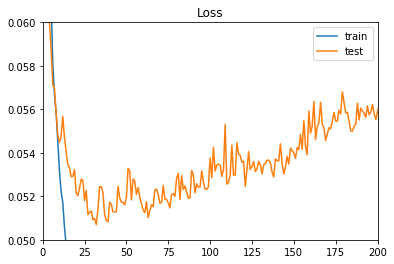

In [157]:
plt.title('Loss')
plt.plot([l[0] for l in tr_eval], label='train')
plt.plot([l[0] for l in te_eval], label='test')
plt.xlim(0, 200)
plt.ylim(0.05, 0.06)
plt.legend()

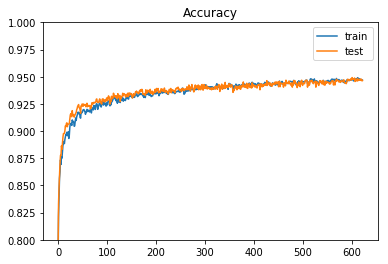

In [156]:
plt.title('Accuracy')
plt.plot([a[1] for a in tr_eval], label='train')
plt.plot([a[1] for a in te_eval], label='test')
plt.ylim(0.8, 1)
plt.legend()

In [221]:
X = test_no_lables['data']

# compute Y_pred

with open('solution.csv', 'w') as fout:
    print("Id,Prediction", file=fout)
    for i in range(len(test['labels'])):
        print(i, Y_pred[i], sep=',', file=fout)